In [7]:
# del create_composite_ref_panel
import importlib

import utils_no_mod
importlib.reload(utils_no_mod)

import pandas as pd
import numpy as np
import zarr
import pickle
from tqdm import trange
import math
from uuid import uuid4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import collections
from utils_no_mod import create_composite_ref_panel, BidiBurrowsWheelerLibrary, get_matches_indices, replace_col, interpolate
from data_utils import remove_sample_from_ref, get_sample_index

In [2]:
samples = [
    # "HG02445",
    "HG02470",
    # "HG02325",
    # "HG02108",
    # "HG02508",
    # "HG02323",
    # "HG02332",
    # "HG02095",
    # "HG02051",
#     "HG02429",
    # "HG02442",
    # "HG01985",
    # "HG02330",
    # "HG02111",
    # "HG02339",
    # "HG02322",
    # "HG02419",
    # "HG02433",
    # "HG02309",
    # "HG02471",
    # "NA20355",
    # "NA19924",
    # "NA19913",
    # "NA20274",
    # "NA20321",
    # "NA20362",
    # "NA20320",
    # "NA20318",
    # "HG03009",
    # "HG03812",
    # "HG03902",
    # "HG03916",
    # "HG00956",
    # "HG02409",
    # "HG02402",
    # "HG01812",
    # "HG02386",
    # "HG01801",
    # "HG02382",
    # "HG02181",
    # "HG01794",
    # "HG02353",
    # "HG02180",
    # "HG02156",
    # "HG02391",
    # "HG01813",
    # "HG00879",
    # "HG02401",
    # "HG00864",

    # "HG02154",
    # "HG01806",
    # "HG02406",
    # "HG02389",
    # "HG01799",
    # "HG01796",
    # "HG01031",
    # "HG02408",
    # "HG02186",
    # "HG02351",
    # "NA12236",
    # "NA18747",
    # "NA18559",
    # "NA18596",
    # "NA18558",
    # "NA18626",
    # "NA18535",
    # "NA18547",
    # "NA18606",
    # "NA18625",
    # "NA18537",
    # "NA18566",
    # "NA18525",
    # "NA18634",
    # "NA18564",
    # "NA18647",
    # "NA18534",
    # "NA18632",
    # "NA18619",
    # "NA18552",
    # "NA18571",
    # "NA18531",
    # "NA18620",
    # "NA18555",
    # "NA18639",
    # "NA18641",
    # "NA18624",
    # "NA18579",
    # "HG03499",
    # "HG00174",
    # "HG00368",
    # "HG00350",
    # "HG00365",
    # "HG00183",
    # "HG00360",
    # "HG00324",
    # "HG00275",
    # "HG00186",
    # "HG00180",
    # "HG00310",
    # "HG00369",
    # "HG00343",
    # "HG00179",
    # "HG00177",
    # "HG00342",
    # "HG00290",
    # "HG00271",
    # "HG00277",
    # "HG00376",
    # "HG00375",
    # "HG00274",
    # "HG00381",
    # "HG00357",
    # "HG00151",
    # "HG00150",
    # "HG00250",
    # "HG00115",
    # "HG00244",
    # "HG00123",
    # "HG00141",
    # "HG01334",
    # "HG00137",
    # "HG00128",
    # "HG00118",
    # "HG00253",
    # "HG00262",
    # "HG00100",
    # "HG02215",
    # "HG00159",
    # "HG00140",
    # "HG00242",
    # "HG00240",
    # "HG00103",
    # "HG00231",
    # "HG00097",
    # "HG00246",
    # "HG00099",
    # "HG00119",
    # "NA20850",
    # "NA21086",
    # "NA21135",
    # "NA20895",
    # "NA21143",
    # "NA21126",
    # "NA21091",
    # "NA21127",
    # "NA20884",
    # "NA21093",
    # "NA21130",
    # "NA21095",
    # "NA21097",
    # "NA20851",
    # "NA20897",
    # "NA20859",
    # "NA20888",

    # "NA20892",
    # "NA21144",
    # "NA20846",
    # "NA21089",
    # "NA20866",
    # "NA20869",
    # "NA21108",
    # "NA21087",
    # "NA21098",
    # "NA21111",
    # "HG04206",
    # "HG03871",
    # "HG03967",
    # "HG04239",
    # "NA18972",
    # "NA18946",
    # "NA18999",
    # "NA18978",
    # "NA19091",
    # "NA18941",
    # "NA18992",
    # "NA18985",
    # "NA18962",
    # "NA18975",
    # "NA19055",
    # "NA18973",
    # "NA19089",
    # "NA18966",
    # "NA18986",
    # "NA19076",
    # "NA19054",
    # "NA18951",
    # "NA19074",
    # "NA18993",
    # "NA18983",
    # "NA18940",
    # "NA19063",
    # "NA18980",
    # "NA19057",
    # "HG02048",
    # "HG02064",
    # "HG01872",
    # "HG01596",
    # "HG01855",
    # "HG02140",
    # "HG02086",
    # "HG01841",
    # "HG01850",
    # "HG01871",
    # "HG02113",
    # "HG01863",
    # "HG01849",
    # "HG01843",
    # "HG01864",
    # "HG01862",
    # "HG01852",
    # "HG01853",
    # "HG01859",
    # "HG01866",
    # "HG01858",
    # "HG01868",
    # "HG01845",
    # "HG01865",
    # "NA19455",
    # "NA19035",
    # "NA19393",
    # "NA19448",
    # "NA19316",
    # "NA19456",
    # "NA19374",
    # "NA19474",
    # "NA19475",
    # "NA19376",
    # "NA19429",
    # "NA19438",
    # "NA19379",
    # "NA19394",
    # "NA19468",
    # "NA19449",
    # "NA19327",
    # "NA19397",
    # "NA19380",
    # "NA19375",
    # "NA19372",
    # "NA19452",
    # "NA19324",
    # "NA19435",
    # "NA19030",
    # "NA19026",
    # "NA19036",
    # "NA19391",
    # "NA19024",
    # "HG03460",
    # "HG03457",
    # "HG03556",
    # "HG03558",
    # "HG03437",
    # "HG03057",
    # "HG03074",
    # "HG03547",
    # "HG03077",
    # "HG03445",
    # "HG03078",
    # "HG03446",
    # "HG03557",
    # "HG03548",
    # "HG03084",
    # "HG03461",
    # "HG03567",
    # "HG03378",
    # "HG03022",
    # "NA20775",
    # "NA20771",
    # "NA20529",
    # "NA20832",
    # "NA20822",
    # "NA20770",
    # "NA20514",
    # "NA20755",
    # "NA20541",
    # "NA20505",
    # "NA20795",
    # "NA20753",
    # "NA20762",
    # "NA20786",
    # "NA20509",
    # "NA20511",
    # "NA20803",
    # "NA20535",
    # "NA20582",
    # "NA20804",
    # "NA20799",
    # "NA20515",
    # "NA20760",
    # "NA20811",
    # "NA20589",
    # "NA20810",
    # "NA20814"
 ]

In [3]:
with open("./data/chip_id_list_full.txt", "rb") as fp:   # Unpickling
    chip_id_list = pickle.load(fp)
with open("./data/full_id_list_full.txt", "rb") as fp:   # Unpickling
    full_id_list = pickle.load(fp)
with open("./data/original_indicies_full.txt", "rb") as fp:   # Unpickling
    original_indicies = pickle.load(fp) 
with open("./data/chip_positions.txt", "rb") as fp:   # Unpickling
    chip_positions = pickle.load(fp)
    
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs


duplicate_pos = ([item for item, count in collections.Counter(chip_positions).items() if count > 1])
duplicate_indexs = []
none = [[duplicate_indexs.append(y) for y in list_duplicates_of(chip_positions, x)] for x in duplicate_pos]
chip_id_list = list(np.delete(np.array(chip_id_list),duplicate_indexs))
original_indicies = [full_id_list.index(x) for x in chip_id_list]

In [ ]:
target_chip_array = zarr.load("./data/target_chip_array.zip")
target_chip_array.shape

In [8]:
HAPS = [0,1]
ref_panel_full_array_full = zarr.load("./data/ref_panel_full_array.zip")
target_full_array = np.zeros((ref_panel_full_array_full.shape[0],2))

for sample in samples:
    full_res_ = {}
# for sample in ["HG02445",]:
    sample_index = get_sample_index(sample)
    target_full_array[:,0] = ref_panel_full_array_full[:,sample_index[0]]
    target_full_array[:,1] = ref_panel_full_array_full[:,sample_index[1]]

    ref_panel_full_array = remove_sample_from_ref(sample_index, ref_panel_full_array_full)

    ref_panel_chip_array = ref_panel_full_array[original_indicies,:]
    target_chip_array = target_full_array[original_indicies,:]
    # best_beagle = get_beagle_res(f"./data/{sample}_BEAGLE_5.4_mapYES_neYES.vcf.gz")
    # target_chip_array = np.concatenate([
    #     best_beagle[0].to_numpy().astype(int).reshape(1647102,1),
    #     best_beagle[1].to_numpy().astype(int).reshape(1647102,1),
    # ],axis=1)[original_indicies,:]

    combined_ref_panel_chip = np.concatenate([ref_panel_chip_array,target_chip_array],axis=1)
    print("Concatenated shape: ", combined_ref_panel_chip.shape)

    for hap in HAPS:

        bidi_pbwt = BidiBurrowsWheelerLibrary(combined_ref_panel_chip.T.astype(np.int8), 6400+hap)
        ppa_matrix = bidi_pbwt.getForward_Ppa()
        div_matrix = bidi_pbwt.getForward_Div()
        rev_ppa_matrix = bidi_pbwt.getBackward_Ppa()
        rev_div_matrix = bidi_pbwt.getBackward_Div()

        forward_pbwt_matches, forward_pbwt_hap_indices = bidi_pbwt.getForward_matches_indices()
        backward_pbwt_matches, backward_pbwt_hap_indices = bidi_pbwt.getBackward_matches_indices()

        num_chip_vars = 14778
        num_hid = ref_panel_full_array.shape[1]

        BI = np.zeros((num_hid,num_chip_vars))
        BJ = np.zeros((num_hid,num_chip_vars))

        for chip_var in trange(0,num_chip_vars):
            forward_pbwt_matches_=forward_pbwt_matches[:,chip_var]
            forward_pbwt_index=ppa_matrix[:,chip_var]
            backward_pbwt_matches_=backward_pbwt_matches[:,chip_var]
            backward_pbwt_index=np.flip(rev_ppa_matrix, axis=1)[:,chip_var]
            BI[:,chip_var] = forward_pbwt_matches_[forward_pbwt_index.argsort()][:num_hid]
            BJ[:,chip_var] = backward_pbwt_matches_[backward_pbwt_index.argsort()][:num_hid]

        chip_indicies = []
        matches = []
        matches_sum = []
        matches_max = []
        indicies_max_matches_set = []
        masked_data_list = []
        
        for i in trange(0,ref_panel_full_array.shape[1]):
            arr_1 = np.array(BJ[i,:])
            mask = BI[i,arr_1.argsort()[::-1]] == 1
            arr_2 = arr_1.argsort()[::-1]
            
            masked_data = np.ma.MaskedArray(arr_2, mask=~mask)
            matches_sum.append(sum(BJ[i,masked_data.compressed()[:]]))
            matches_max.append(max(BJ[i,masked_data.compressed()[:]]))
            masked_data_list.append(masked_data)
        
        # for i in trange(0,BI.shape[1]):
        #     arr_1 = np.array(BJ[:,i])
        #     mask = BI[arr_1.argsort()[::-1],i] == 1
        #     arr_2 = arr_1.argsort()[::-1]
            
        #     masked_data = np.ma.MaskedArray(arr_2, mask=~mask)
        #     try:
        #         matches_max.append(max(BJ[masked_data.compressed()[:],i]))
        #     except:
        #         matches_max.append(-1)


        matches_sum_indxs = np.array(matches_sum).argsort()[::-1]


        for match_idx in matches_sum_indxs[:len(matches_sum_indxs)//2]:
            indicies_max_matches_set.extend(
                list(masked_data_list[match_idx].compressed()[:25])
            )

        indicies_max_matches_set = np.array(indicies_max_matches_set)
        _, idx = np.unique(indicies_max_matches_set, return_index=True)
        indicies_max_matches_set = indicies_max_matches_set[np.sort(idx)]
        indicies_max_matches_set = list(indicies_max_matches_set)
        average = int(np.average(np.array(matches_max)))
        print(f"AVERAGE: {average}")

        indicies_max_matches_set_new = []
        for c,i in enumerate(indicies_max_matches_set):
            flago = True
            for j in range(0,c):
                if abs(indicies_max_matches_set[j] - i) < average:
                    flago = False
                    # if matches_max[indicies_max_matches_set[j]] > matches_max[i]:
                    #     indicies_max_matches_set_new.remove(i)
                    #     indicies_max_matches_set_new.append((indicies_max_matches_set[j], matches_max[indicies_max_matches_set[j]]))
                    #     indicies_max_matches_set_new.append(indicies_max_matches_set[j])
            if flago:
                indicies_max_matches_set_new.append(i)


        # sorted(indicies_max_matches_set_new, key=lambda x: x[1])
        # indicies_max_matches_set_new_ = []
        # indicies_max_matches_set_new = [x[0] for x in indicies_max_matches_set_new]
        # for c,i in enumerate(indicies_max_matches_set_new):
        #     flago = True
        #     for j in range(0,c):
        #         if abs(indicies_max_matches_set_new[j] - i) < average:
        #             flago = False

        #     if flago:
        #         indicies_max_matches_set_new_.append(i)

        # bigger_than = np.array(indicies_max_matches_set_new)[list(np.where(np.array(indicies_max_matches_set_new) > 6000)[0])]
        # indicies_max_matches_set_1 = list(np.array(bigger_than)[list(np.where(np.array(bigger_than) < 8000)[0])])[:20]

        # smaller_than = list(np.array(indicies_max_matches_set_new)[list(np.where(np.array(indicies_max_matches_set_new) < 6000)[0])])
        # bigger_than_2 = list(np.array(indicies_max_matches_set_new)[list(np.where(np.array(indicies_max_matches_set_new) > 8000)[0])])
        # indicies_max_matches_set_2 = (smaller_than + bigger_than_2)[:25]
        indicies_max_matches_set_new = np.array(indicies_max_matches_set_new)
        indicies_max_matches_set_new = np.delete(indicies_max_matches_set_new, np.where(indicies_max_matches_set_new == 0), axis=0)
        # indexess = list(np.where(np.array(indicies_max_matches_set_new) < 3000)[0])
        # indicies_max_matches_set_new = list(indicies_max_matches_set_new)
        
        # indicies_max_matches_set_new = list(
        #     indicies_max_matches_set_new[np.where(indicies_max_matches_set_new[np.where(np.array(indicies_max_matches_set_new) >= 4000)[0]] <= 5000)[0]]
        # )
        all_haps, composite_ref_panel_1, matches_for_haps = create_composite_ref_panel(
            ref_panel_full_array,
            BJ,
            BI,
            original_indicies,
            matches_sum_indxs,
            indicies_max_matches_set_new,
            0
        )
        # if lenall_haps
        # limito = len(indicies_max_matches_set_new) //2
        composite_ref_panel_2= composite_ref_panel_1[:,:] / np.sum(matches_for_haps[:,:],axis=1)[:,None]
        arr__ = np.zeros((composite_ref_panel_2.shape[0],))
        x = np.sum(composite_ref_panel_2,axis=1)

        arr__[x >= 0.5] = 1

        resultoo_ = interpolate(all_haps,original_indicies, ref_panel_full_array)
        full_res_.setdefault(sample, []).append(resultoo_.copy())
        if hap == 1:
            print("saving results")
            with open(f'saved_dictionary_{str(sample)}_new_method_test.pkl', 'wb') as f:
                pickle.dump(full_res_, f)

Concatenated shape:  (14778, 6402)


100%|██████████| 6400/6400 [00:12<00:00, 494.48it/s]


AVERAGE: 84


100%|██████████| 94/94 [00:20<00:00,  4.53it/s]
0it [00:00, ?it/s]
100%|██████████| 6400/6400 [00:12<00:00, 494.23it/s]


AVERAGE: 79


100%|██████████| 85/85 [00:19<00:00,  4.47it/s]
0it [00:00, ?it/s]
100%|██████████| 14777/14777 [01:41<00:00, 145.77it/s]

saving results


HG02470
COMBINED BEAGLE ERROR: 18409
TOTAL IMPUTED SEGMENT LENGTH: 1645757
COMBINED SELPHI ERROR: 20207
TOTAL IMPUTED SEGMENT LENGTH: 1645757



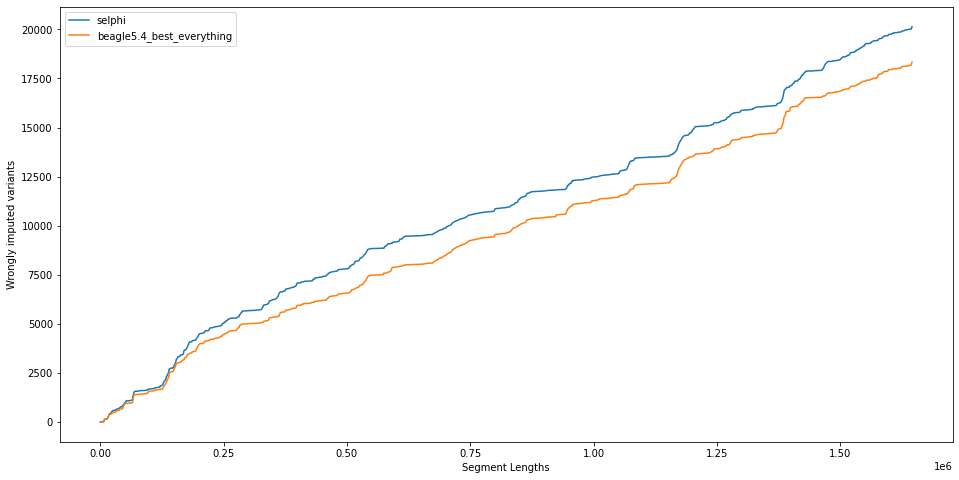

In [11]:
def get_beagle_res(file_name):
    beagle_array = pd.read_csv(file_name, sep="\t", header=None, comment="#")
    beagle_array.drop([0,1,3,4,5,6,7,8],axis=1,inplace=True)
    concat_beagle = pd.concat([
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[0]),
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[-1]),
    ],axis=1)
    concat_beagle.drop([2],axis=1,inplace=True)
    concat_beagle.columns = [0,1]
    return concat_beagle

ref_panel_full_array_full = zarr.load("./data/ref_panel_full_array.zip")
target_full_array = np.zeros((ref_panel_full_array_full.shape[0],2))

FINALE = {}
START = 0
END = -1
for c, sample in enumerate(samples):
    print(sample)
    # with open(f"saved_dictionary_{sample}_new_method_test.pkl", "rb") as fp:   # Unpickling
    #     full_res_ = pickle.load(fp)
    with open(f"saved_dictionary_{sample}_new_method_test.pkl", "rb") as fp:   # Unpickling
        full_res_ = pickle.load(fp)
    # print(sample)
    sample_index = get_sample_index(sample)
    target_full_array[:,0] = ref_panel_full_array_full[:,sample_index[0]]
    target_full_array[:,1] = ref_panel_full_array_full[:,sample_index[1]]
    indicies_for_comparison = np.where(
        (np.sum(ref_panel_full_array_full,axis=1) >0) & 
        # (np.sum(ref_panel_full_array_full,axis=1) > 0)  &
        (np.sum(target_full_array,axis=1) >= 0))[0]
    arr__1 = full_res_[sample][0]
    arr__2 = full_res_[sample][1]
    arr__1[original_indicies] = target_full_array[original_indicies,0]
    arr__2[original_indicies] = target_full_array[original_indicies,1]

    best_beagle = get_beagle_res(f"./data/{sample}_BEAGLE_5.4_mapYES_neYES.vcf.gz")
    new_x = target_full_array[:,0][indicies_for_comparison][START:END] + target_full_array[:,1][indicies_for_comparison][START:END]
    y = best_beagle[0].to_numpy().astype(int)[indicies_for_comparison][START:END]+ best_beagle[1].to_numpy().astype(int)[indicies_for_comparison][START:END]
    print(f"COMBINED BEAGLE ERROR: {int(y.shape - np.sum(new_x == y))}")
    print(f"TOTAL IMPUTED SEGMENT LENGTH: {y.shape[0]}")

    FINALE[sample] = [int(y.shape - np.sum(new_x == y))]
    
    # new_x = target_full_array[:,0][0:] + target_full_array[:,1][0:]
    y = arr__1[indicies_for_comparison][START:END] + arr__2[indicies_for_comparison][START:END]
    print(f"COMBINED SELPHI ERROR: {int(y.shape - np.sum(new_x == y))}")
    print(f"TOTAL IMPUTED SEGMENT LENGTH: {y.shape[0]}")
    temp = FINALE[sample]
    temp.append(int(y.shape - np.sum(new_x == y)))
    FINALE[sample] = temp[:]

    print()
    STEP_LENGTH = 500

    MAX_LENGTH = y.shape[0]-STEP_LENGTH
    lengths = list(range(STEP_LENGTH,MAX_LENGTH,STEP_LENGTH))

    selphi_res_old = []
    beagle_res = []


    combined_target_full = target_full_array[:,0] + target_full_array[:,1]
    combined_concat_old = arr__1 + arr__2

    combined_beagle =  best_beagle[0].to_numpy().astype(int)[:] + best_beagle[1].to_numpy().astype(int)[:]
    for LENGTH in lengths:
        selphi_res_old.append(LENGTH - np.sum( combined_target_full[:LENGTH] == combined_concat_old[:LENGTH] ))
        beagle_res.append(int(LENGTH - np.sum(combined_target_full[:LENGTH] == combined_beagle[:LENGTH])))

    fig, ax = plt.subplots(figsize=(16,8))    # to create the picture plot empty  

    plt.plot(lengths, selphi_res_old, label = "selphi")
    plt.plot(lengths, beagle_res, label = "beagle5.4_best_everything")


    ax.set_xlabel("Segment Lengths",fontsize=10)
    ax.set_ylabel("Wrongly imputed variants",fontsize=10)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.legend()

    plt.show()
    # plt.savefig(f'image_name_{sample}_new.jpg',format="jpg",dpi=200,transparent=True,bbox_inches='tight')

In [ ]:
df_ = pd.DataFrame(list(zip(
    [FINALE[x][0] for x in FINALE.keys()],
    [FINALE[x][1] for x in FINALE.keys()],
    list(FINALE.keys())
    )),columns =['Beagle', 'Selphi', "Samples"])

In [ ]:
df_.to_csv("results_samples.tsv",sep="\t",index=None)

In [ ]:
sum(df_["Selphi"] < df_["Beagle"])

In [ ]:
samples_pop = pd.read_csv("samples_pop.tsv",sep=" ")

In [ ]:
df = pd.DataFrame(list(zip(
    [FINALE[x][0] for x in FINALE.keys()] + [FINALE[x][1] for x in FINALE.keys()],
    ["Beagle"]*len(FINALE.keys()) + ["Selphi"]*len(FINALE.keys()),
    list(FINALE.keys()) + list(FINALE.keys()),
    [samples_pop["Population"][samples_pop["ID"] == x].head(1).item() for x in FINALE.keys()] + [samples_pop["Population"][samples_pop["ID"] == x].head(1).item() for x in FINALE.keys()],
    )),columns =['numMismatches', 'Tool', 'sample', 'population']
)

In [ ]:
sum(df[df["Tool"] == "Selphi"]["numMismatches"])

In [ ]:
sum(df[df["Tool"] == "Beagle"]["numMismatches"])

In [ ]:
# del sns
import seaborn as sns
importlib.reload(sns)

for id, df__ in df.groupby("population"):
    print(id)
    sns.set(rc={'figure.figsize':(38.7,20.27)})
    sns_plot = sns.barplot(x="sample",y="numMismatches",hue="Tool",data=df__)
    plt.xticks(rotation=45)
    sns_plot.set_title(f"{id} Population",fontsize=50)
    # sns_plot.axes.set_title("Title",fontsize=50)
    sns_plot.set_xlabel("sample",fontsize=40)
    sns_plot.set_ylabel("numMismatches",fontsize=40)
    sns_plot.tick_params(labelsize=7)
    sns_plot.set_xticklabels(sns_plot.get_xmajorticklabels(), fontsize = 25)
    sns_plot.set_yticklabels(list(map(int,sns_plot.get_yticks().tolist())), fontsize = 25)
    plt.setp(sns_plot.get_legend().get_texts(), fontsize='42') # for legend text
    plt.setp(sns_plot.get_legend().get_title(), fontsize='42') # for legend title
    plt.close("all")
    sns_plot.figure.savefig(f"./figures/{id}samples_real.png",format="png",dpi=300)

In [ ]:
del sns
import seaborn as sns
importlib.reload(sns)

for id, df__ in df.groupby("population"):
    print(id)
    
    sns.set(rc={'figure.figsize':(38.7,20.27)})
    sns_plot = sns.lineplot(x="sample",y="numMismatches",hue="Tool",data=df__, linewidth = 9,style="Tool",markers=True,dashes=False)
    plt.xticks(rotation=45)
    sns_plot.set_title(f"{id} Population",fontsize=50)
    # sns_plot.axes.set_title("Title",fontsize=50)
    sns_plot.set_xlabel("sample",fontsize=40)
    sns_plot.set_ylabel("numMismatches",fontsize=40)
    sns_plot.tick_params(labelsize=7)
    sns_plot.set_xticklabels(sns_plot.get_xmajorticklabels(), fontsize = 25)
    sns_plot.set_yticklabels(list(map(int,sns_plot.get_yticks().tolist())), fontsize = 25)
    plt.setp(sns_plot.get_legend().get_texts(), fontsize='42') # for legend text
    plt.setp(sns_plot.get_legend().get_title(), fontsize='42') # for legend title
    plt.close("all")
    sns_plot.figure.savefig(f"./figures/{id}samples_real_line.png",format="png",dpi=300)

In [ ]:
# Generate dummy data into a dataframe

df = pd.DataFrame(list(zip(
    [FINALE[x][0] for x in FINALE.keys()],
    [FINALE[x][1] for x in FINALE.keys()]
    )),columns =['Beagle', 'Selphi'])

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
beagle = ax.bar(index, df["Beagle"].value_counts(), bar_width,
                label="BEAGLE5.4 results")

selphi = ax.bar(index+bar_width, df["Selphi"].value_counts(),
                 bar_width, label="SELPHI results")

ax.set_xlabel('sample')
ax.set_ylabel('chr20 mismatches')
ax.set_title('mismatches count by sample, and tool')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(FINALE.keys()))
ax.legend()

plt.show()

In [ ]:
# TEST NEW METHOD
del create_composite_ref_panel
import importlib
import utils_all_method
importlib.reload(utils_all_method)

import pandas as pd
import numpy as np
import zarr
import pickle
from tqdm import trange
import math
from uuid import uuid4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import collections
from utils_all_method import create_composite_ref_panel, BidiBurrowsWheelerLibrary, get_matches_indices, replace_col
from data_utils import remove_sample_from_ref, get_sample_index

# Regression Analysis

In [ ]:
def get_best_limit(
    target_full_array,
    ref_panel_full_array,
    original_indicies,
    hap_list,
    chip_index,
    BJ,
):
    results = []
    range_start = original_indicies[chip_index]
    range_end =  original_indicies[chip_index + 1]
    composite_ref_panel = np.zeros(
            (1647102, len(hap_list)), dtype=np.int16
        )
    matches_for_haps = np.ones(
    (1647102, len(hap_list)), dtype=np.int16
    )
    for i in range(len(hap_list)):
        
        matches = int(BJ[hap_list[i], chip_index])
        # print(hap_list[i])
        composite_ref_panel[original_indicies[chip_index] : original_indicies[chip_index + matches],i] = ref_panel_full_array[
                    original_indicies[chip_index] : original_indicies[
                        chip_index + matches
                    ],
                    hap_list[i],
                ] * matches

        matches_for_haps[original_indicies[chip_index] : original_indicies[chip_index + matches],i] = matches_for_haps[
                    original_indicies[chip_index] : original_indicies[
                        chip_index + matches
                    ],
                    -1,
                ] * matches
    # print(composite_ref_panel[range_start:range_end,:2])

    for i in range(1,len(hap_list)):
        composite_ref_panel_2= composite_ref_panel[:,:i] / np.sum(matches_for_haps[:,:i],axis=1)[:,None]
        # print(composite_ref_panel_2)
        arr__ = np.zeros((composite_ref_panel.shape[0],))
        x = np.sum(composite_ref_panel_2,axis=1)

        arr__[x >= 0.5] = 1
        new_x = target_full_array[range_start:range_end,1]
        y = arr__[range_start:range_end]
        results.append(int(y.shape - np.sum(new_x == y)))
    print(results)
    return np.argsort(results)[0] + 1

In [ ]:
def get_best_limit(
    target_full_array,
    ref_panel_full_array,
    original_indicies,
    hap_list,
    chip_index,
    BJ,
):
    results = []
    range_start = original_indicies[chip_index]
    range_end =  original_indicies[chip_index + 1]
    composite_ref_panel = np.zeros(
            (1647102, len(hap_list)), dtype=np.int16
        )
    matches_for_haps = np.ones(
    (1647102, len(hap_list)), dtype=np.int16
    )
    for i in range(len(hap_list)):
        
        matches = int(BJ[hap_list[i], chip_index])
        # print(hap_list[i])
        composite_ref_panel[original_indicies[chip_index] : original_indicies[chip_index + matches],i] = ref_panel_full_array[
                    original_indicies[chip_index] : original_indicies[
                        chip_index + matches
                    ],
                    hap_list[i],
                ] * matches

        matches_for_haps[original_indicies[chip_index] : original_indicies[chip_index + matches],i] = matches_for_haps[
                    original_indicies[chip_index] : original_indicies[
                        chip_index + matches
                    ],
                    -1,
                ] * matches
    # print(composite_ref_panel[range_start:range_end,:2])

    composite_ref_panel_2= composite_ref_panel[:,:3] / np.sum(matches_for_haps[:,:3],axis=1)[:,None]
    # print(composite_ref_panel_2)
    arr__ = np.zeros((composite_ref_panel.shape[0],))
    x = np.sum(composite_ref_panel_2,axis=1)

    arr__[x >= 0.5] = 1
    new_x = target_full_array[range_start:range_end,1]
    y = arr__[range_start:range_end]

    return int(y.shape - np.sum(new_x == y))

In [ ]:
summation = 0
for chip_index in range(2100,2200):
    hap_list = ordered_matches[chip_index]

    best_limit = get_best_limit(
        target_full_array,
        ref_panel_full_array,
        original_indicies,
        hap_list,
        chip_index,
        BJ,
    )
# print(summation)
    print([BJ[hap, chip_index] for hap in hap_list])
    # print(f"VARIANCE -> {np.var([BJ[hap, chip_index] for hap in hap_list])}")
    print(f"BEst LIMIT -> {best_limit}")
    print("--")

In [10]:

from collections import defaultdict

ordered_hap_indices = {}
ordered_matches = {}
lengtho = 100

for i in trange(0, BJ.shape[1]):
    y = np.where(BJ[:, i] >= np.percentile(BJ[:, i], 0))[0]
    # y = np.where(BI[:, i] < 5)[0]
    x = BJ[y, i]
    # y = np.arange(BJ.shape[0])
    new_index = y[np.argsort(x)[::-1]]  # Descending
    ordered_matches[i] = BJ[new_index, i][:lengtho]
    ordered_hap_indices[i] = new_index.copy()[:lengtho]

for i in trange(0, BJ.shape[1]):
    d = defaultdict(list)
    for key, val in np.concatenate(
        [
            ordered_matches[i].reshape(len(ordered_matches[i]), 1),
            ordered_hap_indices[i].reshape(len(ordered_hap_indices[i]), 1),
        ],
        axis=1,
    ):
        d[key].append((val, np.where(matches_sum_indxs == val)[0][0]))
    sorted_by_second = {x: sorted(d[x], key=lambda tup: tup[1]) for x in d}
    ordered_matches[i] = [
        int(dd[0]) for e in sorted_by_second for dd in sorted_by_second[e]
    ]


100%|██████████| 14778/14778 [00:21<00:00, 685.10it/s]


In [ ]:
index = 998
[print(BJ[x,index]) for x in ordered_matches[index][:20]]

In [ ]:
ordered_matches[index]

In [ ]:
def get_beagle_res(file_name):
    beagle_array = pd.read_csv(file_name, sep="\t", header=None, comment="#")
    beagle_array.drop([0,1,3,4,5,6,7,8],axis=1,inplace=True)
    concat_beagle = pd.concat([
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[0]),
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[-1]),
    ],axis=1)
    concat_beagle.drop([2],axis=1,inplace=True)
    concat_beagle.columns = [0,1]
    return concat_beagle

ref_panel_full_array_full = zarr.load("./data/ref_panel_full_array.zip")
target_full_array = np.zeros((ref_panel_full_array_full.shape[0],2))

FINALE = {}
MAC = 50

ref_panel_full_array_full
for c, sample in enumerate(samples):
    print(sample)
    # with open(f"selpphi-imputed/saved_dictionary_{sample}_new_method.pkl", "rb") as fp:   # Unpickling
    #     full_res = pickle.load(fp)
    # print(sample)
    sample_index = get_sample_index(sample)
    target_full_array[:,0] = ref_panel_full_array_full[:,sample_index[0]]
    target_full_array[:,1] = ref_panel_full_array_full[:,sample_index[1]]
    indicies_for_comparison = np.where(
        (np.sum(ref_panel_full_array_full,axis=1) > 0)
        # (np.sum(ref_panel_full_array_full,axis=1) > 0)  &
        # (np.sum(target_full_array,axis=1) >= 1)
    )[0]

    arr__1 = (full_res["HG02442"][0][:,0] > 0.7*full_res["HG02442"][0][:,1]).astype(int)
    arr__2 = (full_res["HG02442"][1][:,0] > 0.7*full_res["HG02442"][1][:,1]).astype(int)
    arr__1[original_indicies] = target_full_array[original_indicies,0]
    arr__2[original_indicies] = target_full_array[original_indicies,1]

    best_beagle = get_beagle_res(f"./data/{sample}_BEAGLE_5.4_mapYES_neYES.vcf.gz")
    new_x = target_full_array[indicies_for_comparison,0][0:] + target_full_array[indicies_for_comparison,1][0:]
    y = best_beagle[0].to_numpy().astype(int)[indicies_for_comparison] + best_beagle[1].to_numpy().astype(int)[indicies_for_comparison]
    print(f"COMBINED BEAGLE ERROR: {int(y.shape - np.sum(new_x == y))}")
    print(f"TOTAL IMPUTED SEGMENT LENGTH: {y.shape[0]}")

    FINALE[sample] = [int(y.shape - np.sum(new_x == y))]
    
    # new_x = target_full_array[:,0][0:] + target_full_array[:,1][0:]
    y = arr__1[indicies_for_comparison] + arr__2[indicies_for_comparison]
    print(f"COMBINED SELPHI ERROR: {int(y.shape - np.sum(new_x == y))}")
    print(f"TOTAL IMPUTED SEGMENT LENGTH: {y.shape[0]}")
    temp = FINALE[sample]
    temp.append(int(y.shape - np.sum(new_x == y)))
    FINALE[sample] = temp[:]

    print()
    STEP_LENGTH = 500

    MAX_LENGTH = y.shape[0]-STEP_LENGTH
    lengths = list(range(STEP_LENGTH,MAX_LENGTH,STEP_LENGTH))

    selphi_res_old = []
    beagle_res = []


    combined_target_full = target_full_array[:,0] + target_full_array[:,1]
    combined_concat_old = arr__1 + arr__2

    combined_beagle =  best_beagle[0].to_numpy().astype(int)[:] + best_beagle[1].to_numpy().astype(int)[:]
    for LENGTH in lengths:
        selphi_res_old.append(LENGTH - np.sum( combined_target_full[:LENGTH] == combined_concat_old[:LENGTH] ))
        beagle_res.append(int(LENGTH - np.sum(combined_target_full[:LENGTH] == combined_beagle[:LENGTH])))

    fig, ax = plt.subplots(figsize=(16,8))    # to create the picture plot empty  

    plt.plot(lengths, selphi_res_old, label = "selphi")
    plt.plot(lengths, beagle_res, label = "beagle5.4_best_everything")


    ax.set_xlabel("Segment Lengths",fontsize=10)
    ax.set_ylabel("Wrongly imputed variants",fontsize=10)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.legend()

    plt.show()
    plt.savefig(f'image_name_{sample}_new.jpg',format="jpg",dpi=200,transparent=True,bbox_inches='tight')

In [ ]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

# BACKWARD-FORWARD ALGORITHM

In [11]:
from hmm_utils import forward
chip_positions_dedup = [int(x.split('-')[1]) for x in chip_id_list]
num_obs = 14778

In [12]:

from collections import defaultdict

ordered_hap_indices = {}
ordered_matches = {}
lengtho = 10

for i in trange(0, BJ.shape[1]):
    y = np.where(BJ[:, i] >= np.percentile(BJ[:, i], 0))[0]
    # y = np.where(BI[:, i] < 5)[0]
    x = BJ[y, i]
    # y = np.arange(BJ.shape[0])
    new_index = y[np.argsort(x)[::-1]]  # Descending
    ordered_matches[i] = BJ[new_index, i][:lengtho]
    ordered_hap_indices[i] = new_index.copy()[:lengtho]

for i in trange(0, BJ.shape[1]):
    d = defaultdict(list)
    for key, val in np.concatenate(
        [
            ordered_matches[i].reshape(len(ordered_matches[i]), 1),
            ordered_hap_indices[i].reshape(len(ordered_hap_indices[i]), 1),
        ],
        axis=1,
    ):
        d[key].append((val, np.where(matches_sum_indxs == val)[0][0]))
    sorted_by_second = {x: sorted(d[x], key=lambda tup: tup[1]) for x in d}
    ordered_matches[i] = [
        int(dd[0]) for e in sorted_by_second for dd in sorted_by_second[e]
    ]


100%|██████████| 14778/14778 [00:02<00:00, 5730.76it/s]


In [13]:
# del forward
# del backward
import hmm_utils
importlib.reload(hmm_utils)
from hmm_utils import forward, backward, create_composite_chip_panel

# composite_chip_panel.shape
results_ = {}
results_["alpha"] = []
results_["beta"] = []

for hapo in [0]:
    for sample in samples:
        beta = backward(num_obs, ordered_matches, chip_positions_dedup)
        alpha = forward(num_obs, ordered_matches, chip_positions_dedup)
        
        
        temp_1 = results_["alpha"]
        temp_2 = results_["beta"]
        temp_1.append(alpha)
        temp_2.append(beta)
        results_["alpha"] = temp_1.copy()
        results_["beta"] = temp_2.copy()


100%|██████████| 999/999 [01:05<00:00, 15.22it/s]


In [12]:
results____ = {}
start = 0
end = 1000
for sample in samples:
    for hapo in [0]:
        posterior = results_["alpha"][hapo] * results_["beta"][hapo] / sum(results_["beta"][0].T[:,0])


        posterior_normalized = []
        [posterior_normalized.append(posterior[start+i,:]/sum(posterior[start+i,:])) for i in range(0,end-start)]
        print(posterior_normalized[0])

        full_constructed_panel = np.zeros((1647102, 2), dtype=np.float32)
        haps = list(range(0,6400))
        one_dosage = np.sum(ref_panel_full_array[:original_indicies[start],haps] * posterior_normalized[0][haps],axis=1)
        zero_dosage = np.sum(np.logical_not(ref_panel_full_array[:original_indicies[start],haps]) * posterior_normalized[0][haps],axis=1)
        full_constructed_panel[:original_indicies[start],0] = one_dosage
        full_constructed_panel[:original_indicies[start],1] = zero_dosage

        for i in trange(0,end-start-1):
            j = start + i
            haps = list(range(0,6400))

            one_dosage = np.sum(ref_panel_full_array[original_indicies[j]:original_indicies[j+1],haps] * (posterior_normalized[i][haps] + posterior_normalized[i+1][haps])/2,axis=1)
            zero_dosage = np.sum(np.logical_not(ref_panel_full_array[original_indicies[j]:original_indicies[j+1],haps]) * (posterior_normalized[i][haps] + posterior_normalized[i+1][haps])/2,axis=1)

            full_constructed_panel[original_indicies[j]:original_indicies[j+1],0] = one_dosage.copy()
            full_constructed_panel[original_indicies[j]:original_indicies[j+1],1] = zero_dosage.copy()
        result = (full_constructed_panel[:,0] > full_constructed_panel[:,1]).astype(np.int16)
        results____.setdefault(sample, []).append(result.copy())


[0. 0. 0. ... 0. 0. 0.]


100%|██████████| 999/999 [00:08<00:00, 119.65it/s]


In [14]:
def get_beagle_res(file_name):
    beagle_array = pd.read_csv(file_name, sep="\t", header=None, comment="#")
    beagle_array.drop([0,1,3,4,5,6,7,8],axis=1,inplace=True)
    concat_beagle = pd.concat([
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[0]),
        beagle_array.applymap(lambda x: str(x).split(":")[0].replace("/","|").split("|")[-1]),
    ],axis=1)
    concat_beagle.drop([2],axis=1,inplace=True)
    concat_beagle.columns = [0,1]
    return concat_beagle

In [13]:
START = original_indicies[0]
END = original_indicies[500]

In [15]:
print("beagle")
for sample in samples:
    best_beagle = get_beagle_res(f"./data/{sample}_BEAGLE_5.4_mapYES_neYES.vcf.gz")
    new_x = target_full_array[START:END,0][0:] + target_full_array[START:END,1][0:]
    y = best_beagle[0].to_numpy().astype(int)[START:END] + best_beagle[1].to_numpy().astype(int)[START:END]
    print(int(y.shape - np.sum(new_x == y)))


beagle
673


In [16]:
print("selphi old interpolation")
for sample in samples:
    new_x = target_full_array[:,1][START:END]
    y = full_res_[sample][0][START:END]
    print(int(y.shape - np.sum(new_x == y)))

selphi old interpolation
468


In [17]:
print("selphi new interpolation")
for sample in samples:
    new_x = target_full_array[:,1][START:END]
    y = resultoo_[START:END]
    print(int(y.shape - np.sum(new_x == y)))

selphi new interpolation
478


In [18]:
print("selphi old interpolation forward-backward")
for sample in samples:
    new_x = target_full_array[:,1][START:END]
    y = results____[sample][0][START:END]
    print(int(y.shape - np.sum(new_x == y)))

selphi old interpolation forward-backward
619


In [19]:
importlib.reload(utils_no_mod)
from utils_no_mod import interpolate_
posterior = results_["alpha"][0].T * results_["beta"][0].T / sum(results_["beta"][0].T[:,0])

posterior_normalized = []
[posterior_normalized.append(np.expand_dims(posterior[:,i]/sum(posterior[:,i]),axis=1)) for i in range(0,1100)]
posterior = np.concatenate(posterior_normalized,axis=1)
resultoo_fb = interpolate_(posterior,original_indicies, ref_panel_full_array)

/tmp/ipykernel_425708/1738467392.py:6: RuntimeWarning: invalid value encountered in true_divide
  [posterior_normalized.append(np.expand_dims(posterior[:,i]/sum(posterior[:,i]),axis=1)) for i in range(0,1100)]
100%|██████████| 1000/1000 [00:07<00:00, 125.23it/s]


In [20]:
print("selphi new interpolation forward-backward")
for sample in samples:
    new_x = target_full_array[:,1][START:END]
    y = resultoo_fb[START:END]
    print(int(y.shape - np.sum(new_x == y)))

selphi new interpolation forward-backward
620
